IAA002 - LPA - Trabalho

### 1 Análise Exploratória dos dados

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

a.	Carregue a base de dados media_precos_carros_brasil.csv

In [19]:
dados = pd.read_csv('precos_carros_brasil.csv')
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [20]:
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [21]:
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

Criando categoria para separar colunas numericas e categoricas: facilita a EAD

In [22]:
numericas_colunas = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_colunas = [col for col in dados.columns if not dados[col].dtype == 'object']

Resumo das variaveis numericas

In [23]:
dados[numericas_colunas].describe()

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


b.	Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [24]:
#verificando se há valores faltante nas colunas
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [25]:
#verificando a quantidade de valores faltante nas linhas
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [109]:
#Verificando as dimensões(linhas x colunas) do conjunto de dados
qtde_linhas_antes = dados.shape
qtde_linhas_antes

(267542, 11)

In [110]:
# Como em todas as colunas há o exato mesmo número de itens faltantes
# verificamos aqui se não são na verdade linhas com todos os dados faltentes
dados.isna().head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


Tratamento de valores faltantes

In [28]:
# Aqui seria uma opção de como tratar os dados faltantes
# Preenchendo com valores que possam ser identificados como neste caso o texto "Nada consta"
# dados['year_of_reference'].fillna('Nada consta', inplace=True)
# dados['month_of_reference'].fillna('Nada consta', inplace=True)
# dados['fipe_code'].fillna('Nada consta', inplace=True)
# dados['authentication'].fillna('Nada consta', inplace=True)
# dados['brand'].fillna('Nada consta', inplace=True)
# dados['model'].fillna('Nada consta', inplace=True)
# dados['fuel'].fillna('Nada consta', inplace=True)
# dados['gear'].fillna('Nada consta', inplace=True)
# dados['engine_size'].fillna('Nada consta', inplace=True)
# dados['year_model'].fillna('Nada consta', inplace=True)

In [112]:
#Para o nosso caso, a forma correta de tratamento será a exclusão
dados.dropna(axis=0, inplace=True)

In [114]:
# Aqui verificamos se foram exclidos exatamente o valor acima das linhas com itens nulos.
# se o valor for igual, quer dizer só existiam linhas inteiras sem dados.

qtde_linhas_depois = dados.shape
qtde_linhas = qtde_linhas_antes[0] - qtde_linhas_depois[0]
qtde_linhas

65245

In [115]:
#Após a exclusão
dados.isna().any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
dtype: bool

c.	Verifique se há dados duplicados nos dados

In [116]:
dados.duplicated().sum()

2

In [34]:
dados.shape

(267542, 11)

d.	Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [120]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_colunas = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_colunas = [col for col in dados.columns if dados[col].dtype == 'object']

In [118]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_colunas].describe()

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [121]:
dados[categoricas_colunas].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297,202297
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,2,44962,425,168685,161885,47420


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [122]:
#contagem de valores por modelo
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [123]:
#contagem de valores por marca
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33151
Renault            29192
Nissan             12090
Name: count, dtype: int64

f. Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados

Com a base de dados que utilizamos para essa tarefa encontramos valores faltantes e valores duplicados, optamos pela remoção dos valores faltantes par podermos fazer os cálculos e pudemos ver que na contagem de valores por marca a Fiat é quem detem o maior valor de vendas, seguida pela VolksWagen e a Chevrolet, os modelos mais vendidos não acompanha essa contagem, temos no caso a Fiata, seguida pela Ford e logo após a Volkswagen.

### 2 Visualização dos dados

a. Gere um gráfico da distribuição da quantidade de carros por marca

[Text(0, 0, '65245.0'),
 Text(0, 0, '44962.0'),
 Text(0, 0, '44312.0'),
 Text(0, 0, '38590.0'),
 Text(0, 0, '33151.0'),
 Text(0, 0, '29192.0'),
 Text(0, 0, '12090.0')]

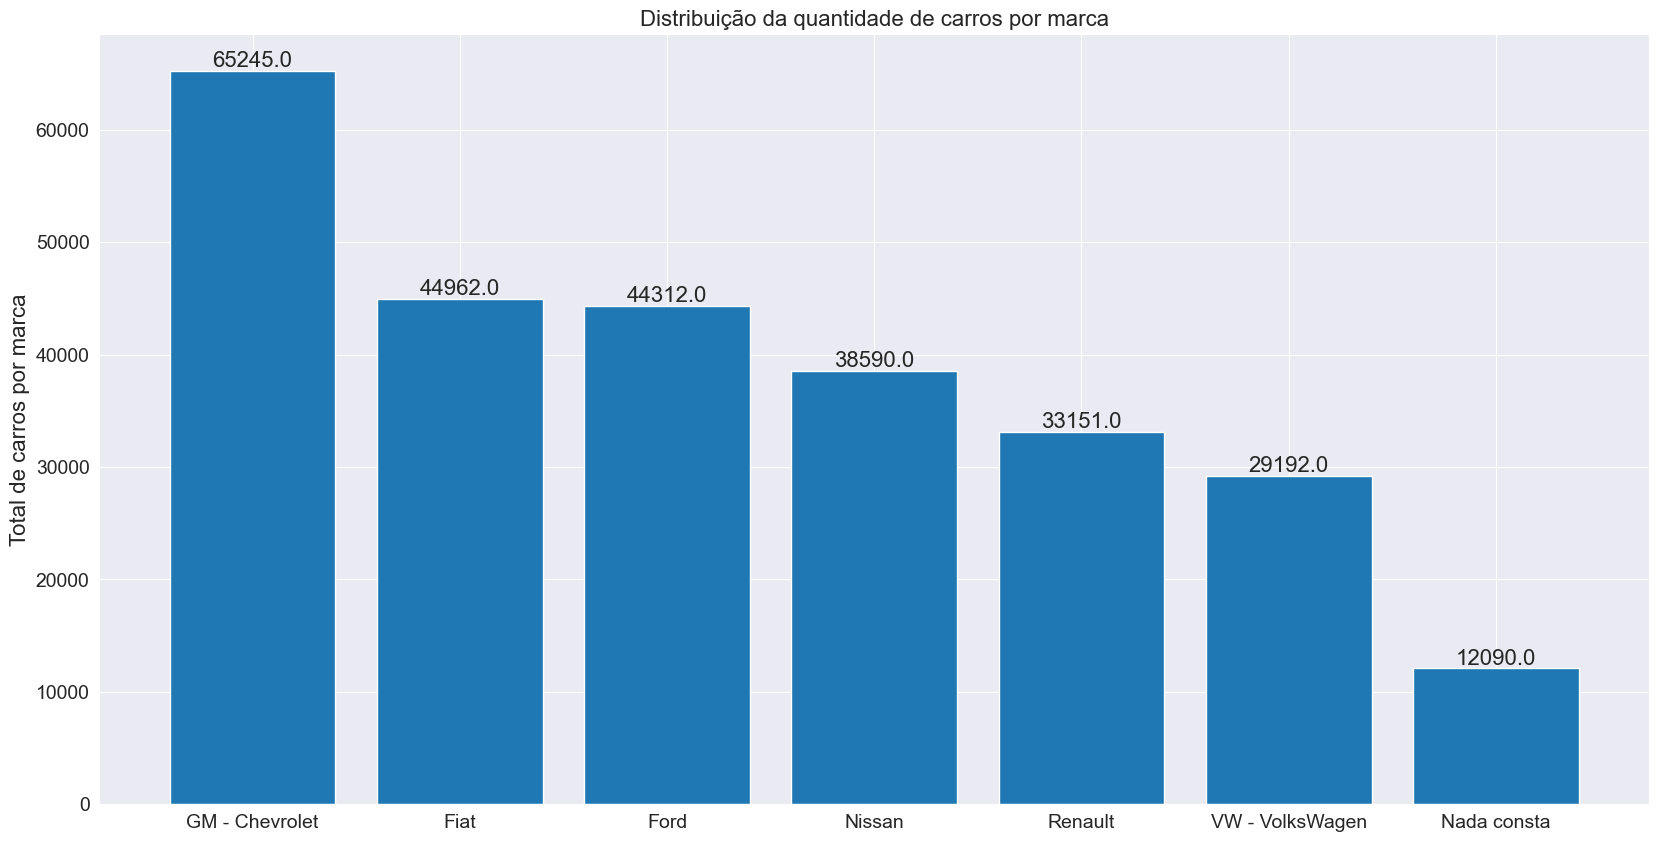

In [66]:
plt.figure(figsize=(20,10))
grafico_1 = plt.bar(dados['brand'].unique(), dados['brand'].value_counts())
plt.title('Distribuição da quantidade de carros por marca', fontsize=16)
plt.ylabel('Total de carros por marca', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar_label(grafico_1, fmt="%.01f", size=16, label_type="edge")

b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

[Text(0, 0, '161885.0'), Text(0, 0, '65245.0'), Text(0, 0, '40412.0')]

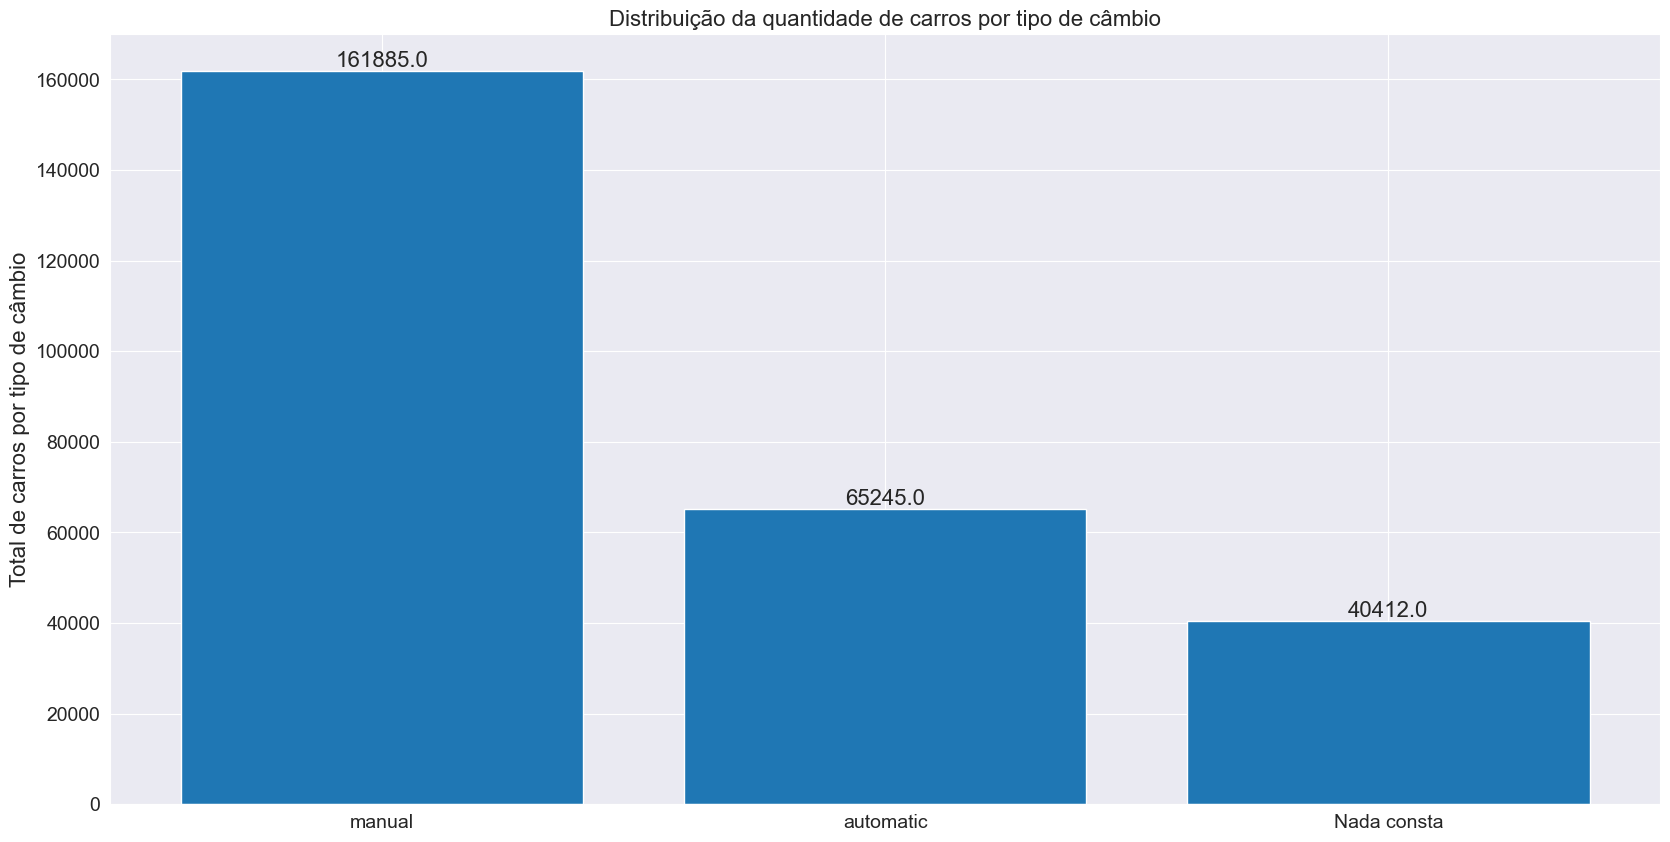

In [69]:
plt.figure(figsize=(20,10))
grafico_1 = plt.bar(dados['gear'].unique(), dados['gear'].value_counts())
plt.title('Distribuição da quantidade de carros por tipo de câmbio', fontsize=16)
plt.ylabel('Total de carros por tipo de câmbio', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar_label(grafico_1, fmt="%.01f", size=16, label_type="edge")

c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [85]:
dados_ano_2022 = dados[dados['year_of_reference'] == 2022]

media_mensal_vendas = dados.groupby('month_of_reference')['avg_price_brl'].mean().round(0)
media_mensal_vendas.head()


month_of_reference
April       50849.0
August      53664.0
December    55848.0
February    49197.0
January     51905.0
Name: avg_price_brl, dtype: float64

In [86]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_mensal_vendas = media_mensal_vendas.reset_index(name='Preco Medio')
media_mensal_vendas.head()

,month_of_reference,Preco Medio
0,April,50849.0
1,August,53664.0
2,December,55848.0
3,February,49197.0
4,January,51905.0


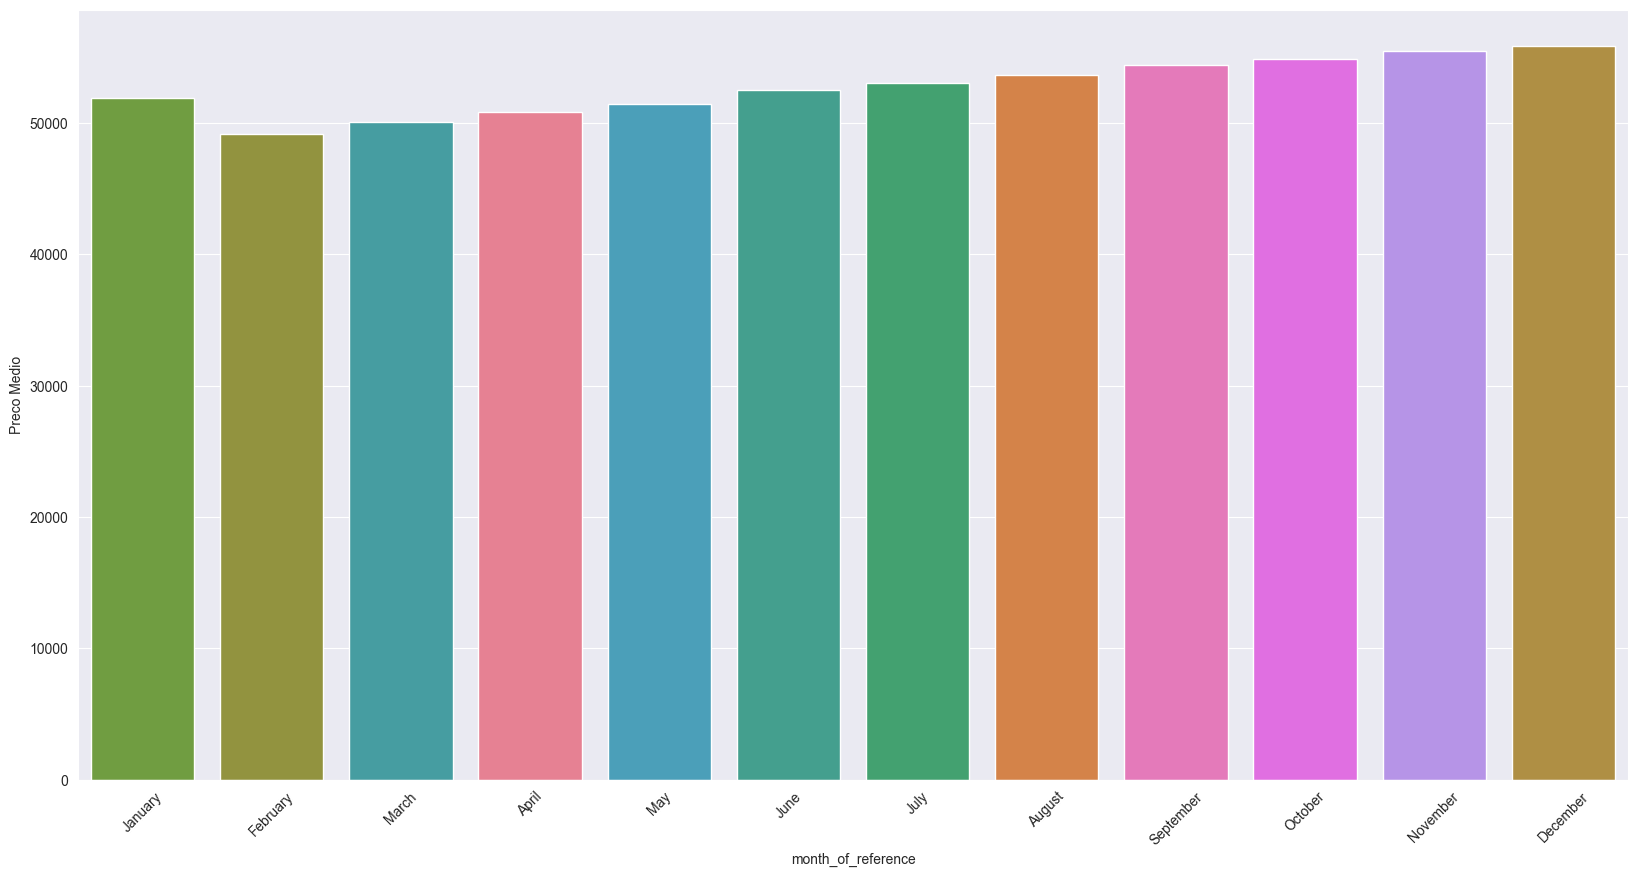

In [88]:
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='month_of_reference', y='Preco Medio', hue='month_of_reference' , data = media_mensal_vendas, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )# falta ordenar por mês
plt.xticks(rotation=45);


 d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de câmbio

e. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d

f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

g. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f